<a href="https://colab.research.google.com/github/jrim42/plant_bacteriology_lab/blob/main/Expr1_ROS_burst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-posthocs

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import sem
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

In [ ]:
f = open('./drive/MyDrive/coding/plant_bacteriology/expr1.txt', 'r', encoding="cp949")
raw_data = f.readlines()

In [ ]:
keyword = "General Data"

data = []
skip_section = False

for line in raw_data:
    if keyword in line:
        # If the keyword is found, set the flag to skip the section
        skip_section = True
    elif not skip_section:
        # If the flag is not set, add the line to the new data
        data.append(line)

In [ ]:
sections = []
tables = []

cur_section = []

for line in data:
    if "Default [ RLU ], Time :" in line:
        # If a new section begins, store the current section and start a new one
        if cur_section:
            sections.append(cur_section)
        cur_section = [line]
    else:
        cur_section.append(line)

# Append the last section
if cur_section:
    sections.append(cur_section)

# Process and store the separated tables
for section in sections:
    header = section[0].strip()
    match = re.search(r"Time\s*:\s*(\d+)", header)
    time_value = int(match.group(1))

    # Extract numerical values and create a 12x8 table
    table = []
    for line in section[1:]:
        values = list(map(int, line.split()))
        if any(values):
            table.append(values)

    # Transpose the table to work on columns
    transposed_table = list(map(list, zip(*table)))

    # Remove columns with all zero values
    filtered_table = [col for col in transposed_table if any(col)]

    # Transpose the table back
    filtered_table = list(map(list, zip(*filtered_table)))

    # Append the table to the list of tables
    tables.append({"time": time_value, "table": filtered_table})

In [ ]:
new_tables = []

for table in tables:
    new_table = {
        'time': table['time'],
        'ctrl_water': table['table'][0],
        'ctrl_flg22': table['table'][1],
        'c_flg22': table['table'][4]
    }
    new_tables.append(new_table)

In [ ]:
tb1 = {}
tb2 = {}
tb3 = {}

for new_table in new_tables:
    time = new_table['time']
    tb1[time] = new_table['ctrl_water']

for new_table in new_tables:
    time = new_table['time']
    tb2[time] = new_table['ctrl_flg22']

for new_table in new_tables:
    time = new_table['time']
    tb3[time] = new_table['c_flg22']

In [ ]:
print(tb1)
print(tb2)
print(tb3)

{0: [1933, 715, 2850, 1766, 1173, 1520, 536, 816], 120: [1464, 603, 2570, 1598, 1039, 1486, 514, 514], 240: [1397, 626, 2425, 1531, 961, 1229, 481, 536], 361: [1252, 559, 2101, 1397, 1006, 1240, 481, 503], 481: [1185, 581, 1475, 1050, 972, 1341, 514, 492], 601: [1118, 570, 1084, 950, 939, 1576, 503, 492], 722: [1162, 514, 972, 861, 905, 1788, 469, 536], 842: [1084, 492, 861, 793, 928, 2168, 525, 503], 962: [1050, 548, 659, 782, 983, 2392, 492, 514], 1083: [961, 481, 603, 738, 1017, 2716, 559, 514], 1203: [961, 503, 592, 771, 939, 2638, 536, 503], 1323: [995, 570, 525, 693, 961, 2459, 548, 548], 1444: [827, 548, 548, 637, 883, 2537, 525, 548], 1564: [872, 581, 469, 648, 905, 2503, 570, 503], 1684: [838, 503, 469, 559, 905, 2146, 592, 492], 1805: [715, 514, 458, 637, 928, 1967, 570, 492]}
{0: [693, 380, 2537, 3565, 1073, 2436, 1140, 2146], 120: [1889, 1028, 2101, 2984, 1173, 2772, 1173, 1330], 240: [4918, 2626, 2470, 3230, 1866, 3509, 2045, 2123], 361: [7858, 4269, 3085, 2615, 2828, 4739

In [ ]:
res1 = {}
res2 = {}
res3 = {}

# std_error는 모집단이 정규분포를 갖는다는 전제를 하지 않는다.
# SD의 경우 모집단이 정규분포를 갖는다는 전제 (모집단 크기가 30 이상은 되어야함)
for time, values in tb1.items():
  mean_value = round(np.mean(values), 2)
  std_error = round(sem(values), 2)
  res1[time] = {'mean': mean_value, 'std_error': std_error}

for time, values in tb2.items():
  mean_value = round(np.mean(values), 2)
  std_error = round(sem(values), 2)
  res2[time] = {'mean': mean_value, 'std_error': std_error}

for time, values in tb3.items():
  mean_value = round(np.mean(values), 3)
  std_error = round(sem(values), 2)
  res3[time] = {'mean': mean_value, 'std_error': std_error}

In [ ]:
print(res1)
print(res2)
print(res3)

{0: {'mean': 1413.62, 'std_error': 271.96}, 120: {'mean': 1223.5, 'std_error': 250.21}, 240: {'mean': 1148.25, 'std_error': 230.41}, 361: {'mean': 1067.38, 'std_error': 196.65}, 481: {'mean': 951.25, 'std_error': 135.63}, 601: {'mean': 904.0, 'std_error': 131.96}, 722: {'mean': 900.88, 'std_error': 154.18}, 842: {'mean': 919.25, 'std_error': 194.44}, 962: {'mean': 927.5, 'std_error': 222.03}, 1083: {'mean': 948.62, 'std_error': 262.26}, 1203: {'mean': 930.38, 'std_error': 252.76}, 1323: {'mean': 912.38, 'std_error': 230.77}, 1444: {'mean': 881.62, 'std_error': 241.43}, 1564: {'mean': 881.38, 'std_error': 238.49}, 1684: {'mean': 813.0, 'std_error': 198.96}, 1805: {'mean': 785.12, 'std_error': 177.12}}
{0: {'mean': 1746.25, 'std_error': 386.5}, 120: {'mean': 1806.25, 'std_error': 268.86}, 240: {'mean': 2848.38, 'std_error': 358.44}, 361: {'mean': 3910.5, 'std_error': 624.16}, 481: {'mean': 5109.5, 'std_error': 914.57}, 601: {'mean': 6122.5, 'std_error': 1213.75}, 722: {'mean': 7505.0, 's

In [ ]:
mean_lst1 = [value['mean'] for key, value in res1.items()]
mean_lst2 = [value['mean'] for key, value in res2.items()]
mean_lst3 = [value['mean'] for key, value in res3.items()]

print("control + water: ", mean_lst1)
print("control + flg22: ", mean_lst2)
print("group C + flg22: ", mean_lst3)

control + water:  [1413.62, 1223.5, 1148.25, 1067.38, 951.25, 904.0, 900.88, 919.25, 927.5, 948.62, 930.38, 912.38, 881.62, 881.38, 813.0, 785.12]
control + flg22:  [1746.25, 1806.25, 2848.38, 3910.5, 5109.5, 6122.5, 7505.0, 8487.62, 9273.25, 10035.0, 10340.88, 10138.12, 9555.38, 9056.25, 8532.0, 7988.25]
group C + flg22:  [1818.75, 3682.625, 7601.125, 11491.25, 14067.875, 14521.0, 14446.5, 14173.875, 13771.25, 13364.625, 12812.25, 11913.375, 11399.25, 11027.125, 10595.125, 10427.25]


In [ ]:
df = pd.DataFrame(
    {'control + water': mean_lst1,
    'control + flg22': mean_lst2,
    'group C + flg22': mean_lst3},
    index = [i for i in range(0, 31, 2)]
    )

df

,control + water,control + flg22,group C + flg22
0,1413.62,1746.25,1818.750
2,1223.50,1806.25,3682.625
4,1148.25,2848.38,7601.125
6,1067.38,3910.50,11491.250
8,951.25,5109.50,14067.875
10,904.00,6122.50,14521.000
12,900.88,7505.00,14446.500
14,919.25,8487.62,14173.875
16,927.50,9273.25,13771.250
18,948.62,10035.00,13364.625


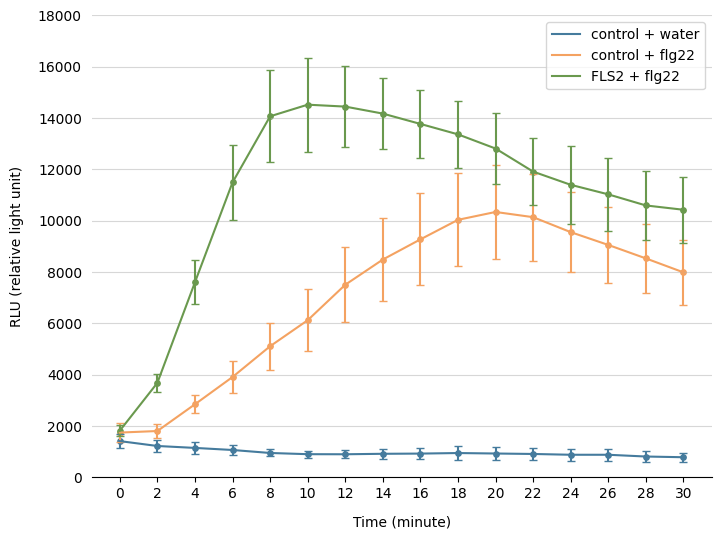

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for res, label, color, marker, markersize in zip([res1, res2, res3], ['control + water', 'control + flg22', 'FLS2 + flg22'], ['#457b9d', '#f4a261', '#6a994e'], ['o', 'o', 'o'], [15, 15, 15]):
    times = [time // 60 for time in res.keys()]
    means = [entry['mean'] for entry in res.values()]
    std_errors = [entry['std_error'] for entry in res.values()]

    ax.errorbar(times, means, yerr=std_errors, capsize=3, label=label, color=color)

    ax.scatter(times, means, color=color, marker=marker, s=markersize)

# 그래프 설정
ax.set_xticks(np.arange(0, max(max(res1.keys()), max(res2.keys()), max(res3.keys())) // 60 + 1, 2))
ax.set_xlabel('Time (minute)', labelpad=10)
ax.set_ylabel('RLU (relative light unit)', labelpad=10)
ax.set_ylim(0, 18000)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
ax.grid(axis='y', linestyle='-', alpha=0.5)
# ax.set_title('ROS burst measure by luminescence in N.benthamiana samples', pad=20)
ax.legend()

handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles, labels)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

---
## > statistical analysis
- about p-value
    - A small p-value (typically less than 0.05 or 0.01) = evidence to reject the null hypothesis in favor of the alternative hypothesis.
    - 작은 p-값은 귀무 가설을 기각할 증거가 된다

In [ ]:
# U test 수행 함수
def perform_u_test(tb1, tb2, tb3, key):
    stat_tb1_tb2, p_tb1_tb2 = mannwhitneyu(tb1[key], tb2[key])
    stat_tb1_tb3, p_tb1_tb3 = mannwhitneyu(tb1[key], tb3[key])
    stat_tb2_tb3, p_tb2_tb3 = mannwhitneyu(tb2[key], tb3[key])

    # 결과를 데이터프레임으로 정리 (p-value만 포함)
    result_df = pd.DataFrame({
        'time': [key],
        'tb1 vs tb2': [p_tb1_tb2],
        'tb1 vs tb3': [p_tb1_tb3],
        'tb2 vs tb3': [p_tb2_tb3]
    })

    return result_df

# 첫 번째 row를 저장할 데이터프레임 초기화
utest_result = pd.DataFrame(columns=['time', 'tb1 vs tb2', 'tb1 vs tb3', 'tb2 vs tb3'])

# U test 수행 및 결과를 데이터프레임에 추가
for key in tb1.keys():
    result_df = perform_u_test(tb1, tb2, tb3, key)
    utest_result = pd.concat([utest_result, result_df], ignore_index=True)


In [ ]:
utest_result

,Key,tb1 vs tb2,tb1 vs tb3,tb2 vs tb3
0,0,0.720901,0.234499,0.878477
1,120,0.188612,0.001348,0.002742
2,240,0.001088,0.000931,0.001933
3,361,0.000155,0.000155,0.001088
4,481,0.000155,0.000155,0.001088
5,601,0.000155,0.000155,0.002953
6,722,0.000155,0.000155,0.006993
7,842,0.000311,0.000155,0.028127
8,962,0.000311,0.000155,0.082984
9,1083,0.000311,0.000155,0.160528


---
### > Shapiro-Wilk test
- The W statistic indicates the goodness of fit between the given sample data and a normal distribution.
- W 통계량은 주어진 샘플 데이터와 정규 분포 사이의 적합도를 나타낸다.
- A W value close to 1 suggests that the data is close to a normal distribution, with values closer to 1 indicating a better fit.
- W 값이 1에 가까울수록 데이터가 정규 분포에 가깝다는 것을 의미한다 (1에 가까울수록 좋은 적합도)

In [ ]:
shapiro_test1 = stats.shapiro(mean_lst1)
shapiro_test2 = stats.shapiro(mean_lst2)
shapiro_test3 = stats.shapiro(mean_lst3)

df_SW = pd.DataFrame(
        {'statistic (W)' : [shapiro_test1.statistic, shapiro_test2.statistic, shapiro_test3.statistic],
        'p-value' : [shapiro_test1.pvalue, shapiro_test2.pvalue, shapiro_test3.pvalue]},
        index = ['control + water', 'control + flg22', 'group C + flg22']
    )
df_SW

,statistic (W),p-value
control + water,0.818928,0.004913
control + flg22,0.872967,0.030201
group C + flg22,0.813729,0.004169


---
### > Mann-Whitney U test
- A higher U statistic indicates a larger difference between the two samples.
- U 통계량이 클수록 두 표본 간의 차이가 크다는 것을 의미

In [ ]:
utest1 = mannwhitneyu(mean_lst1, mean_lst2)
utest2 = mannwhitneyu(mean_lst1, mean_lst3)
utest3 = mannwhitneyu(mean_lst2, mean_lst3)

df_MW = pd.DataFrame(
        {'statistic (U)' : [utest1.statistic, utest2.statistic, utest3.statistic],
        'p-value' : [utest1.pvalue, utest2.pvalue, utest3.pvalue]},
        index = ['case1 - case2', 'case1 - case3', 'case2 - case3']
    )
df_MW

,statistic (U),p-value
case1 - case2,0.0,0.000002
case1 - case3,0.0,0.000002
case2 - case3,36.0,0.000564


---
### > Friedman Test
- Q represents the variance of ranks within each group, and a low Q suggests no difference in medians across groups.
- Q 값은 각 그룹 내의 순위의 분산에 관한 것이며, 낮은 값은 각 그룹 간의 중앙값의 차이가 없다는 것.
- A high Q indicates a potential difference in medians among the groups.
- Q 값이 크면 그룹 간에 중앙값의 차이가 있을 가능성이 높다.

In [ ]:
FM = friedmanchisquare(mean_lst1, mean_lst2, mean_lst3)

df_FM = pd.DataFrame(
        {'statistic (Q)' : [FM.statistic],
        'p-value' : [FM.pvalue]},
        index = ['friedman test']
    )
df_FM

,statistic (Q),p-value
friedman test,32.0,1.125352e-07


---
### > Kruskal-Wallis H Test
- H represents a statistic that assesses whether there are differences in medians among groups.
- H 값은 그룹 간의 중앙값 차이가 있는지를 나타내는 통계량.
- A high H suggests evidence of differences in medians among groups.
- H 값이 크면 적어도 하나의 그룹에서 중앙값 차이가 있다는 증거로 해석된다.
- Large H values are interpreted as evidence that at least one group has a different median compared to the others.
- 큰 H 값은 적어도 하나의 그룹에서 다른 그룹과 다른 중앙값를 가진다는 증거로 해석된다.

In [ ]:
KS = kruskal(mean_lst1, mean_lst2, mean_lst3)

df_KS = pd.DataFrame(
        {'statistic (H)' : [KS.statistic],
        'p-value' : [KS.pvalue]},
        index = ['H test']
    )
df_KS

,statistic (H),p-value
H test,36.744898,1.049414e-08


In [ ]:
posthoc_results = posthoc_dunn([mean_lst1, mean_lst2, mean_lst3], p_adjust='bonferroni')
posthoc_results

,1,2,3
1,1.000000e+00,0.000681,5.551722e-09
2,6.805882e-04,1.000000,6.048094e-02
3,5.551722e-09,0.060481,1.000000e+00


- (1, 2): 그룹 1과 그룹 2 간의 비교에서 p-값이 0.000681로 유의수준 0.05보다 작다. 따라서 그룹 1과 그룹 2 간에는 통계적으로 유의한 차이가 있다.
- (1, 3): 그룹 1과 그룹 3 간의 비교에서 p-값이 5.55e-09로 매우 작다. 따라서 그룹 1과 그룹 3 간에는 통계적으로 유의한 차이가 있다.
- (2, 3): 그룹 2와 그룹 3 간의 비교에서 p-값이 0.060481로 유의수준 0.05보다 크다. 따라서 그룹 2와 그룹 3 간에는 통계적으로 유의한 차이가 없다고 해석할 수 있다.



---